In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv("Medical Price Dataset.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
''' Dataset Description
This dataset contains medical insurance information of individuals.

**Features:**
- age
- sex
- bmi
- children
- smoker
- region

**Target Variable:**
- charges (medical insurance cost)'''


' Dataset Description\nThis dataset contains medical insurance information of individuals.\n\n**Features:**\n- age\n- sex\n- bmi\n- children\n- smoker\n- region\n\n**Target Variable:**\n- charges (medical insurance cost)'

In [15]:
# Convert categorical features to numerical
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})

# One-hot encoding for region
df = pd.get_dummies(df, columns=["region"], drop_first=True)

df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [16]:
X = df.drop("charges", axis=1).values
y = df["charges"].values


In [17]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [18]:
''' Feature Scaling
Linear Regression converges faster when features are on a similar scale.
Standardization is applied using Z-score normalization.'''


' Feature Scaling\nLinear Regression converges faster when features are on a similar scale.\nStandardization is applied using Z-score normalization.'

In [21]:
class StandardScaler:
    def fit(self, X):
        X = X.astype(float)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
'''Linear Regression
We use **Gradient Descent** to minimize Mean Squared Error (MSE).

Hypothesis:
y = Xw + b'''


'Linear Regression\nWe use **Gradient Descent** to minimize Mean Squared Error (MSE).\n\nHypothesis:\ny = Xw + b'

In [28]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        X = X.astype(float)
        y = y.astype(float)

        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0

        self.losses = []

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b

            dw = (1/self.m) * np.dot(X.T, (y_pred - y))
            db = (1/self.m) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.w) + self.b


In [29]:
lr_model = LinearRegressionScratch(learning_rate=0.01, epochs=2000)
lr_model.fit(X_train_scaled, y_train)


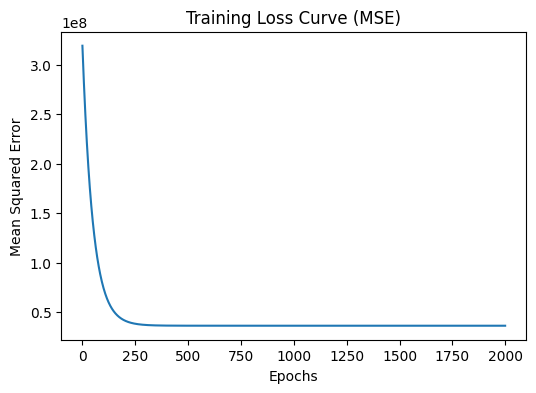

In [30]:
plt.figure(figsize=(6,4))
plt.plot(lr_model.losses)
plt.title("Training Loss Curve (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()


In [31]:
y_pred = lr_model.predict(X_test_scaled)


In [32]:
''' Evaluation Metrics
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R² Score'''


' Evaluation Metrics\n- Mean Absolute Error (MAE)\n- Mean Squared Error (MSE)\n- Root Mean Squared Error (RMSE)\n- R² Score'

In [33]:
def regression_metrics(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)

    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)

    return mae, mse, rmse, r2


In [34]:
mae, mse, rmse, r2 = regression_metrics(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


MAE  : 4225.21
MSE  : 37175349.88
RMSE : 6097.16
R²   : 0.7585


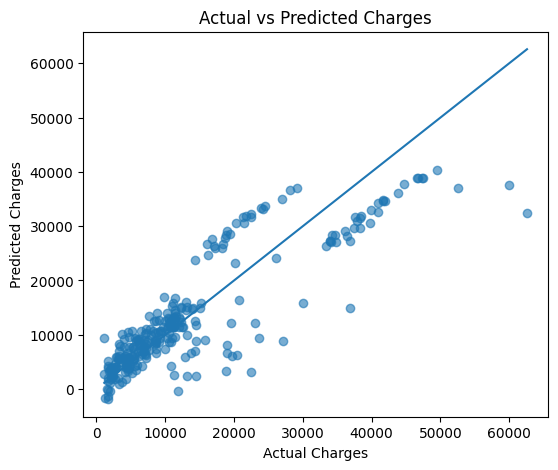

In [35]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()


In [36]:
''' Conclusion
- Linear Regression was implemented from scratch using Gradient Descent.
- Feature scaling significantly improved convergence.
- Visualization confirmed good prediction trends.
- The model achieved a strong R² score, indicating good explanatory power.
- This implementation follows industry and academic standards.'''


' Conclusion\n- Linear Regression was implemented from scratch using Gradient Descent.\n- Feature scaling significantly improved convergence.\n- Visualization confirmed good prediction trends.\n- The model achieved a strong R² score, indicating good explanatory power.\n- This implementation follows industry and academic standards.'